## Learning outcome

1. Grometric transformation: rotation, translation, offline transformation and perspectove transformation
2. Drawing function
    -line
    -circle
    -ellipse
    -rectangle
    -text
3. Bitwise operation
    -OR, AND, XOR, NOT
4. Convolution: Smoothing and sharpening. this operation are central to CNN.

## SETUP

In [13]:
import sys
# assert Python 3.7 or later is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import cv2 as cv2
import numpy as np
from util_func import *

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [2]:
!pip install scipy

## Geometric transformation

In [18]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img("translation", dst)

## Rotation

In [19]:
yc, xc = h // 2, w // 2
angle = 45

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w,h))

show_img("rotation", dst)

## Affine transformation

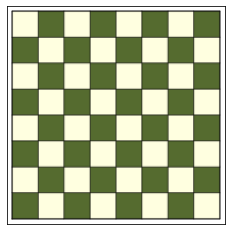

In [17]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

plt_img(img)

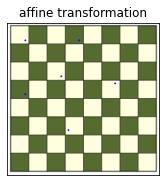

In [22]:
h, w = img.shape[:2]
p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
#get the m
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img_copy, M, (w, h))

for pt in p1:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
plt.subplot(121), plt_img(img, title="original")
plt.subplot(121), plt_img(img, title="affine transformation")
plt.show()


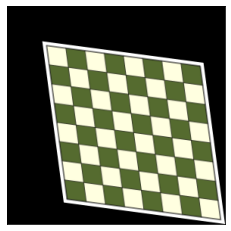

In [25]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

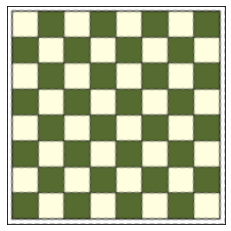

In [26]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restore = cv.warpAffine(dst_new, M_inv,(w, h))

plt_img(ori_restore)

## perspective transform

In [3]:
img = cv.imread("images/name_card_sample.webp")

show_img("name_card", img, adjust=True)

In [4]:
# to get the corners, mouse callback function
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(526, 475)
(1181, 290)
(1317, 717)
(620, 784)


In [5]:
from scipy.spatial.distance import euclidean

In [6]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp)

# ex1

In [32]:
img = cv.imread("images/dice.jfif")

show_img("dice", img, adjust=True)

In [33]:
# to get the corners, mouse callback function
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(9, 70)
(77, 98)
(81, 135)
(18, 104)


In [35]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp)

## Draw function

#### Line

In [36]:
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [40]:
img_copy = img.copy()
cv.line(img_copy, (80, 150), (200, 50), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

#### circle

In [42]:
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (100, 100, 100), 2, cv.LINE_AA)
show_img("circle", img_copy)

#### ellipse

In [46]:
img_copy = img.copy()
axes = (25, 50)
angle = 0

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 180, (50, 100, 150), 2)
show_img("ellipse", img_copy)

#### rectangle

In [48]:
img_copy = img.copy()
cv.rectangle(img_copy, (100, 10), (190, 90), (0, 0, 255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

#### text

In [50]:
img_copy = img.copy()
cv.putText(img_copy, "I am a hapi dog", (15, 150), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 60), 2)
show_img("text", img_copy)

## ex1

In [55]:
img = np.zeros((400, 400), dtype="uint8")

yc, xc = img.shape[0] // 2, img.shape[1] //2

radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)

cv.putText(img, "Bulleye", (20, 385), cv.FONT_HERSHEY_SIMPLEX, 0.6, 255,2)

show_img("bulleye", img)

## demo
We can develop a simple drawing tool / app with OpenCV GUI. Trackbar introduction

In [ ]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, BLUE, GREEN, CYAN, MAGENTA, YELLOW, WHITE)

#define trackbar function, mouse callback function and finally a while loop to drawing

def nothing(x):
    pass

p0 = p1 = (0, 0)
def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos("thickness", "window")
        
        if d==0:
            d=-1
        i = cv.getTrackbarPos("color", "window")
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow("window", img)
        
img = np.zeros((400, 400, 3), dtype=np.uint8)      
cv.namedWindow("window")
cv.createTrackbar("color", "window", 0, 6, nothing)
cv.createTrackbar("thickness", "window", 0, 10, nothing)
cv.setMouseCallback("window", mouse)

while(1):
    cv.imshow("window", img)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

#### bitwise operators

In [7]:
rect = np.zeros((400, 400), dtype = np.uint8)

rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), dtype = np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rect", rect)
show_img("circle", circle)

In [8]:
res_AND = cv.bitwise_and(rect, circle)
show_img('AND operator result', res_AND)

In [9]:
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [11]:
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [12]:
res_not = cv.bitwise_not(rect)
show_img("NOT", res_not)

bitwise operation is one of the important process that make up segmentation pipeline

In [4]:
img = cv.imread("images/dog.jfif")

#masking

h, w = img.shape[:2]
mask = np.zeros((h, w), dtype = np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask=mask)
show_img("face", face)

## Convolution

#### identity kernel

In [5]:
kernel = np.zeros((3,3))
kernel[1, 1] = 1

img = cv.imread("images/opencv_logo.png")

dst = cv.filter2D(img, -1, kernel)

cv.imshow("img", img)
show_img("identity", dst)

### Use cases
- CNN
- smoothing / denoising
- edge detection
- shaperning

In [7]:
#shaperning

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")
sharpen = cv.filter2D(img, -1, kernel)

cv.imshow("img", img)
show_img("sharpen", sharpen)

In [8]:
# blurring
kernel = np.ones((5,5)) / 25.0

blur = cv.filter2D(img, -1, kernel)

show_img("blur", blur)

In [9]:
unsharped_masking = cv.addWeighted(img, 1.75, blur, -0.75, 0)

show_img("unsharped_masking", unsharped_masking)

#### Blurring
4 functions:
- cv.blur : average filter
- cv.gaussianBlur() : Gaussian filter
- cv.medianBlur(): median filter, eliminating salt and pepper noise
- cv.bilateralFilter(): edge-preserving filter

# Ex1
1.Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
Use external libraries imutils.
Modify the transformation matrix.

In [15]:
!pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=f50eeab2e9f431d15f203650270145c9182d142c924978a3ac6559adc08940fc
  Stored in directory: c:\users\leaf0\appdata\local\pip\cache\wheels\c2\02\32\f3617a9f68bcc67eda3ebeb4514eba18f62e81ff439428109d
Successfully built imutils


In [26]:
import imutils

# Load the input image
image_path = "images/lena.jfif"
image = cv2.imread(image_path)

# Get the center of the image
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# Define the rotation angle (in degrees)
angle = 45

# Compute the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# Determine the new dimensions of the rotated image
cosine = abs(rotation_matrix[0, 0])
sine = abs(rotation_matrix[0, 1])
new_w = int((h * sine) + (w * cosine))
new_h = int((h * cosine) + (w * sine))

# Adjust the rotation matrix to prevent cropping
rotation_matrix[0, 2] += (new_w / 2) - center[0]
rotation_matrix[1, 2] += (new_h / 2) - center[1]

# Perform the actual rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (new_w, new_h))

# Display the original and rotated images
show_img("rotate_image", rotated_image)

# Ex2
2.Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:
bee and flowers

In [39]:
# Load two images
img1 = cv.imread("images/native-bee.png")
img2 = cv.imread("images/flower.jfif")

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 100, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

3. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':
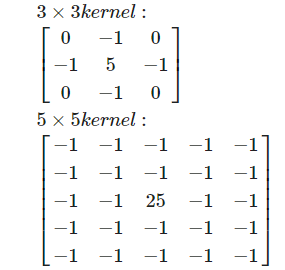
What can you infer from the outputs?

In [42]:
# Load the image
image_path = "images/native-bee.png"
image = cv2.imread(image_path)

# Define custom sharpening kernels
kernel_3x3 = np.array([[0, -1, 0],
                       [-1,  5, -1],
                       [0, -1, 0]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, 25, -1, -1],
                       [-1,  1, -1,  1, -1],
                       [-1, -1, -1, -1, -1]])

# Apply the custom kernels using convolution
sharpened_image_3x3 = cv2.filter2D(image, -1, kernel_3x3)
sharpened_image_5x5 = cv2.filter2D(image, -1, kernel_5x5)

# Display the original and sharpened images
cv2.imshow("Original Image", image)
cv2.imshow("Sharpened Image (3x3)", sharpened_image_3x3)
cv2.imshow("Sharpened Image (5x5)", sharpened_image_5x5)
cv2.waitKey(0)
cv2.destroyAllWindows()

4. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

In [51]:
# Load the image
image_path = "images/noise_lena.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply blur
average_blurred = cv2.blur(gray_image, (3, 3))

# Display the result
cv2.imshow("Average Filter", average_blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Apply Gaussian Kernel
gaussian_blurred = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Display the result
cv2.imshow("Gaussian Kernel", gaussian_blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Apply Median Filter
median_blurred = cv2.medianBlur(gray_image, 3)

# Display the result
cv2.imshow("Median Filter", median_blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Apply bilateral filter
bilateral_filtered = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
cv2.imshow("Bilateral Filtered Image", bilateral_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()
